In [1]:
import pandas as pd

data = pd.read_csv("../datasets/penguins_regression.csv")
data.head()

,Flipper Length (mm),Body Mass (g)
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,193.0,3450.0
4,190.0,3650.0


In [2]:
import seaborn as sns
sns.set_context("poster")

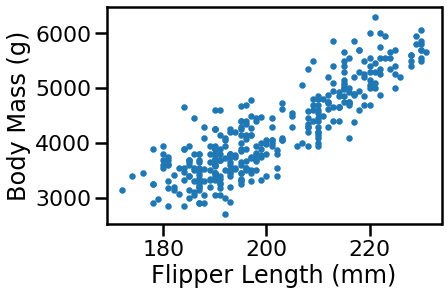

In [3]:
_ = data.plot.scatter(x="Flipper Length (mm)", y="Body Mass (g)")

In [4]:
X, y = data[["Flipper Length (mm)"]], data["Body Mass (g)"]

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

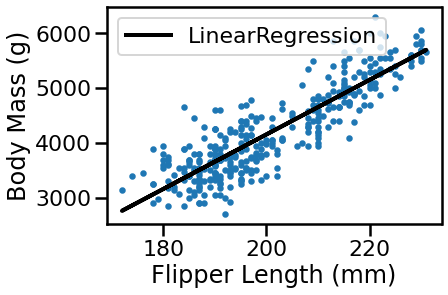

In [6]:
ax = data.plot.scatter(x="Flipper Length (mm)", y="Body Mass (g)")
ax.plot(X, y_pred, label=model.__class__.__name__, color="black", linewidth=4)
_ = ax.legend()

In [7]:
data = data.append(
    {"Flipper Length (mm)": 230, "Body Mass (g)": 300},
    ignore_index=True
)
data

,Flipper Length (mm),Body Mass (g)
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,193.0,3450.0
4,190.0,3650.0
...,...,...
338,202.0,3400.0
339,193.0,3775.0
340,210.0,4100.0
341,198.0,3775.0


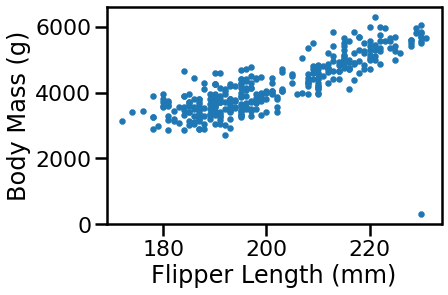

In [8]:
_ = data.plot.scatter(x="Flipper Length (mm)", y="Body Mass (g)")

In [9]:
X, y = data[["Flipper Length (mm)"]], data["Body Mass (g)"]

In [10]:
import numpy as np
sample_weight = np.ones_like(y)
sample_weight[-1] = 10

In [11]:
model.fit(X, y, sample_weight=sample_weight)
y_pred = model.predict(X)

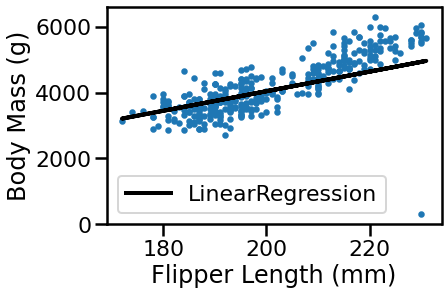

In [12]:
ax = data.plot.scatter(x="Flipper Length (mm)", y="Body Mass (g)")
ax.plot(X, y_pred, label=model.__class__.__name__, color="black", linewidth=4)
_ = ax.legend()

In [13]:
from sklearn.linear_model import HuberRegressor

model = HuberRegressor()
model.fit(X, y, sample_weight=sample_weight)
y_pred = model.predict(X)

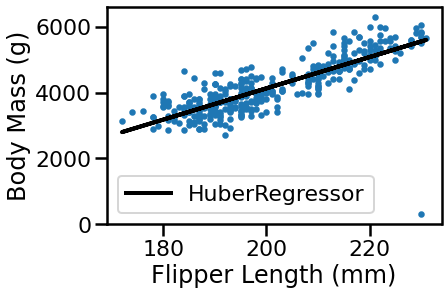

In [14]:
ax = data.plot.scatter(x="Flipper Length (mm)", y="Body Mass (g)")
ax.plot(X, y_pred, label=model.__class__.__name__, color="black", linewidth=4)
_ = ax.legend()

In [15]:
def se_loss(y_true, y_pred):
    loss = (y_true - y_pred) ** 2
    return loss

In [16]:
def huber_loss(y_true, y_pred, *, epsilon):
    mask_greater_epsilon = np.abs(y_true - y_pred) > epsilon
    loss = np.zeros_like(y_pred)
    loss[mask_greater_epsilon] = np.abs(y_true - y_pred)[mask_greater_epsilon]
    loss[~mask_greater_epsilon] = se_loss(y_true, y_pred)[~mask_greater_epsilon]
    return loss

In [17]:
def absolute_loss(y_true, y_pred):
    loss = np.abs(y_true - y_pred)
    return loss

In [21]:
xmin, xmax = -2, 2
xx = np.linspace(xmin, xmax, 100)

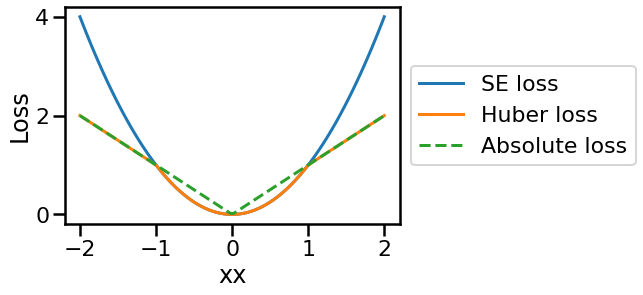

In [34]:
import matplotlib.pyplot as plt

plt.plot(xx, se_loss(0, xx), label="SE loss")
plt.plot(xx, huber_loss(0, xx, epsilon=1), label="Huber loss")
plt.plot(xx, absolute_loss(0, xx), label="Absolute loss", linestyle="--")
plt.ylabel("Loss")
plt.xlabel("xx")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

In [24]:
from sklearn.linear_model import QuantileRegressor

model = QuantileRegressor(quantile=0.5)
model.fit(X, y, sample_weight=sample_weight)
y_pred = model.predict(X)

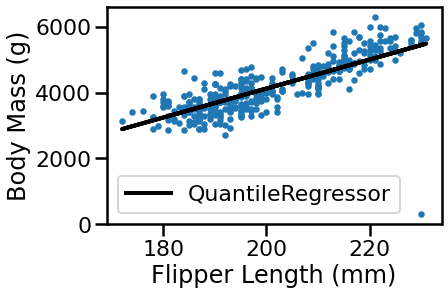

In [25]:
ax = data.plot.scatter(x="Flipper Length (mm)", y="Body Mass (g)")
ax.plot(X, y_pred, label=model.__class__.__name__, color="black", linewidth=4)
_ = ax.legend()

In [31]:
model = QuantileRegressor(quantile=0.5, solver="highs")
model.fit(X, y, sample_weight=sample_weight)
y_pred_median = model.predict(X)

model.set_params(quantile=0.90)
model.fit(X, y, sample_weight=sample_weight)
y_pred_90 = model.predict(X)

model.set_params(quantile=0.10)
model.fit(X, y, sample_weight=sample_weight)
y_pred_10 = model.predict(X)

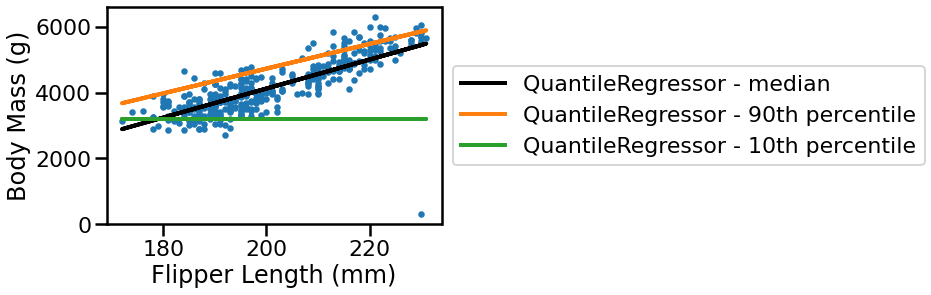

In [33]:
ax = data.plot.scatter(x="Flipper Length (mm)", y="Body Mass (g)")
ax.plot(X, y_pred_median, label=f"{model.__class__.__name__} - median", color="black", linewidth=4)
ax.plot(X, y_pred_95, label=f"{model.__class__.__name__} - 90th percentile", color="tab:orange", linewidth=4)
ax.plot(X, y_pred_5, label=f"{model.__class__.__name__} - 10th percentile", color="tab:green", linewidth=4)
_ = ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))